In [2]:
# 1. Cargar y explorar los datos
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar dataset con delimitador correcto
file_path = "/content/SI_L10_KMEANS_DATASET.csv"
# Cambiar el delimitador de ';' a ','
df = pd.read_csv(file_path, delimiter=',')

# Explorar datos
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

# Selección de características para clustering (basado en descripción y exploración)
features = ['wins', 'kills', 'kdRatio', 'level', 'scorePerMinute', 'gamesPlayed']

print("\nEstadísticas descriptivas de características relevantes:")
print(df[features].describe())

Primeras filas del dataset:
                     name  wins  kills  kdRatio  killstreak  level  losses  \
0         RggRt45#4697369     0      0  0.00000           0      1       0   
1      JohniceRex#9176033     0      0  0.00000           0      1       0   
2  bootybootykill#1892064     0     66  1.03125           0      9       0   
3           JNaCo#5244172     3      2  0.40000           0      1       0   
4   gomezyayo_007#6596687     0      2  0.20000           0      1       0   

   prestige  hits  timePlayed  headshots  averageTime  gamesPlayed  assists  \
0         0     0           0          0          0.0            0        0   
1       110     0           7          0          7.0            0        0   
2       110     0          32         16         32.0            0        1   
3         0     0           3          0          3.0            0        0   
4       110     0           5          1          5.0            0        0   

   misses     xp  scorePerMi

In [3]:
# 2. Aplicar K-Means para agrupar jugadores

# Escalar datos para K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

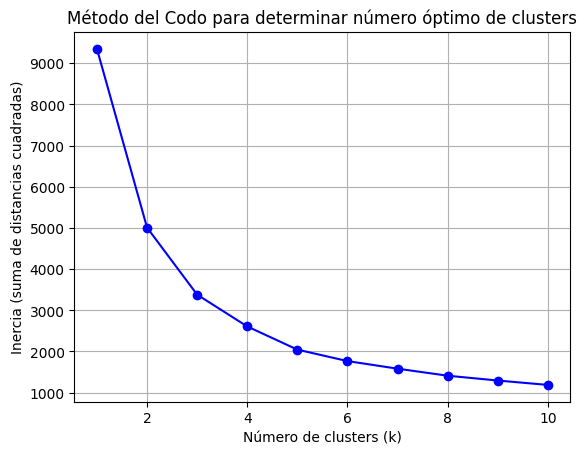

In [4]:
# 3. Determinar número óptimo de clusters con método del codo
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar método del codo con paleta dada (#FFD6BA)
plt.plot(k_range, inertias, marker='o', linestyle='-', color='BLUE')
plt.title("Método del Codo para determinar número óptimo de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (suma de distancias cuadradas)")
plt.grid(True)
plt.show()

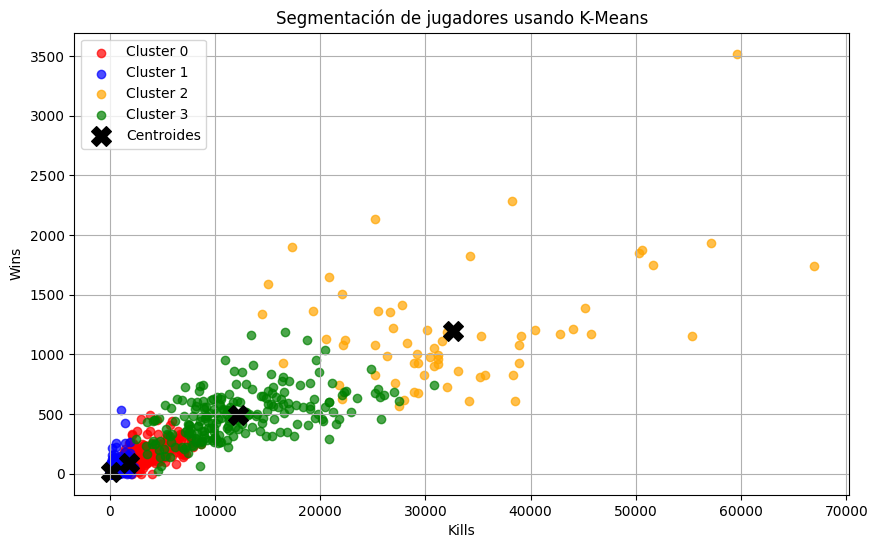

In [5]:
# 4. Visualizar resultados aplicando K-Means con k=4 (basado en gráfico)

k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

colors = ['RED', 'BLUE', 'ORANGE', 'GREEN']

plt.figure(figsize=(10, 6))

for cluster in range(k_opt):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['kills'], cluster_data['wins'],
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.7)

# Centroides en escala original
centroids = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids)
plt.scatter(centroids_unscaled[:, 1], centroids_unscaled[:, 0],
            color='black', marker='X', s=200, label='Centroides')

plt.xlabel("Kills")
plt.ylabel("Wins")
plt.title("Segmentación de jugadores usando K-Means")
plt.legend()
plt.grid(True)
plt.show()

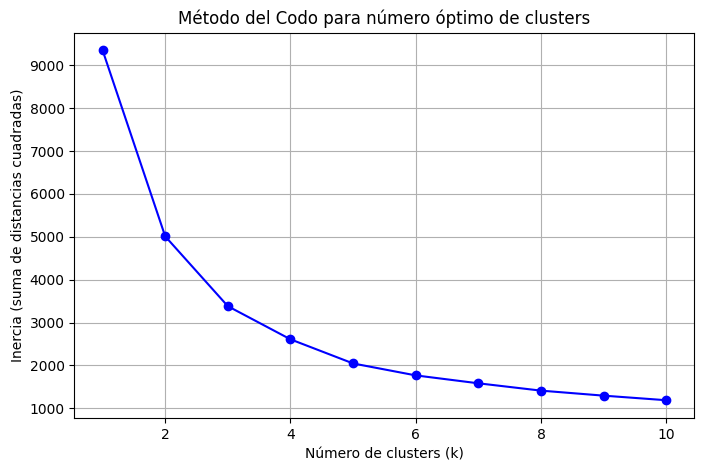

In [6]:
plt.figure(figsize=(8,5))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='BLUE')
plt.title("Método del Codo para número óptimo de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (suma de distancias cuadradas)")
plt.grid(True)
plt.show()

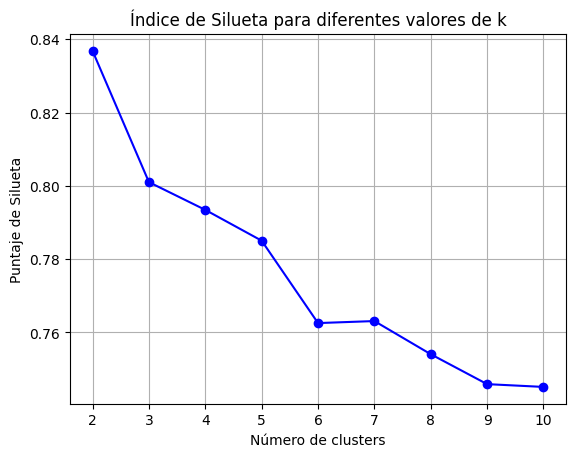

El número óptimo de clusters según el índice de silueta es: 2


In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

file_path = "/content/SI_L10_KMEANS_DATASET.csv"
df = pd.read_csv(file_path, delimiter=',')

# Seleccionamos las características relevantes para la segmentación
features = ['wins', 'kills', 'kdRatio', 'level', 'scorePerMinute', 'gamesPlayed']
X = df[features]

# Lista para almacenar el puntaje de silueta para cada valor de k
silhouette_scores = []

# Evaluamos el puntaje de silueta para k entre 2 y 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)  # X es el conjunto de datos
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el puntaje de silueta en función de k
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='BLUE')
plt.title("Índice de Silueta para diferentes valores de k")
plt.xlabel("Número de clusters")
plt.ylabel("Puntaje de Silueta")
plt.grid(True)
plt.show()

# Mostrar el valor máximo y el número de clusters óptimo
optimal_k_silhouette = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"El número óptimo de clusters según el índice de silueta es: {optimal_k_silhouette}")

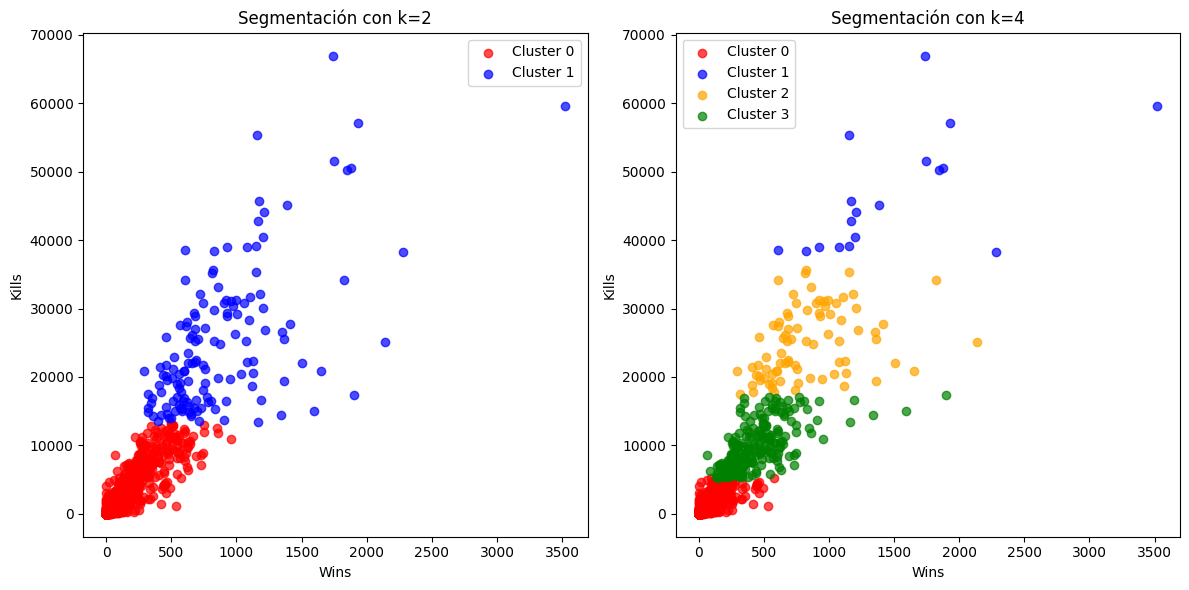

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicamos K-Means con k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster_2'] = kmeans_2.fit_predict(X)

# Aplicamos K-Means con k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster_4'] = kmeans_4.fit_predict(X)

colors = ['RED', 'BLUE', 'ORANGE', 'GREEN']

# Visualizar los clusters para k=2
plt.figure(figsize=(12, 6))

# Subgráfico 1: k=2
plt.subplot(1, 2, 1)
for cluster in range(2):
    cluster_data = df[df['Cluster_2'] == cluster]
    plt.scatter(cluster_data['wins'], cluster_data['kills'], color=colors[cluster], label=f'Cluster {cluster}', alpha=0.7)
plt.title("Segmentación con k=2")
plt.xlabel("Wins")
plt.ylabel("Kills")
plt.legend()

# Subgráfico 2: k=4
plt.subplot(1, 2, 2)
for cluster in range(4):
    cluster_data = df[df['Cluster_4'] == cluster]
    plt.scatter(cluster_data['wins'], cluster_data['kills'], color=colors[cluster], label=f'Cluster {cluster}', alpha=0.7)
plt.title("Segmentación con k=4")
plt.xlabel("Wins")
plt.ylabel("Kills")
plt.legend()

plt.tight_layout()
plt.show()

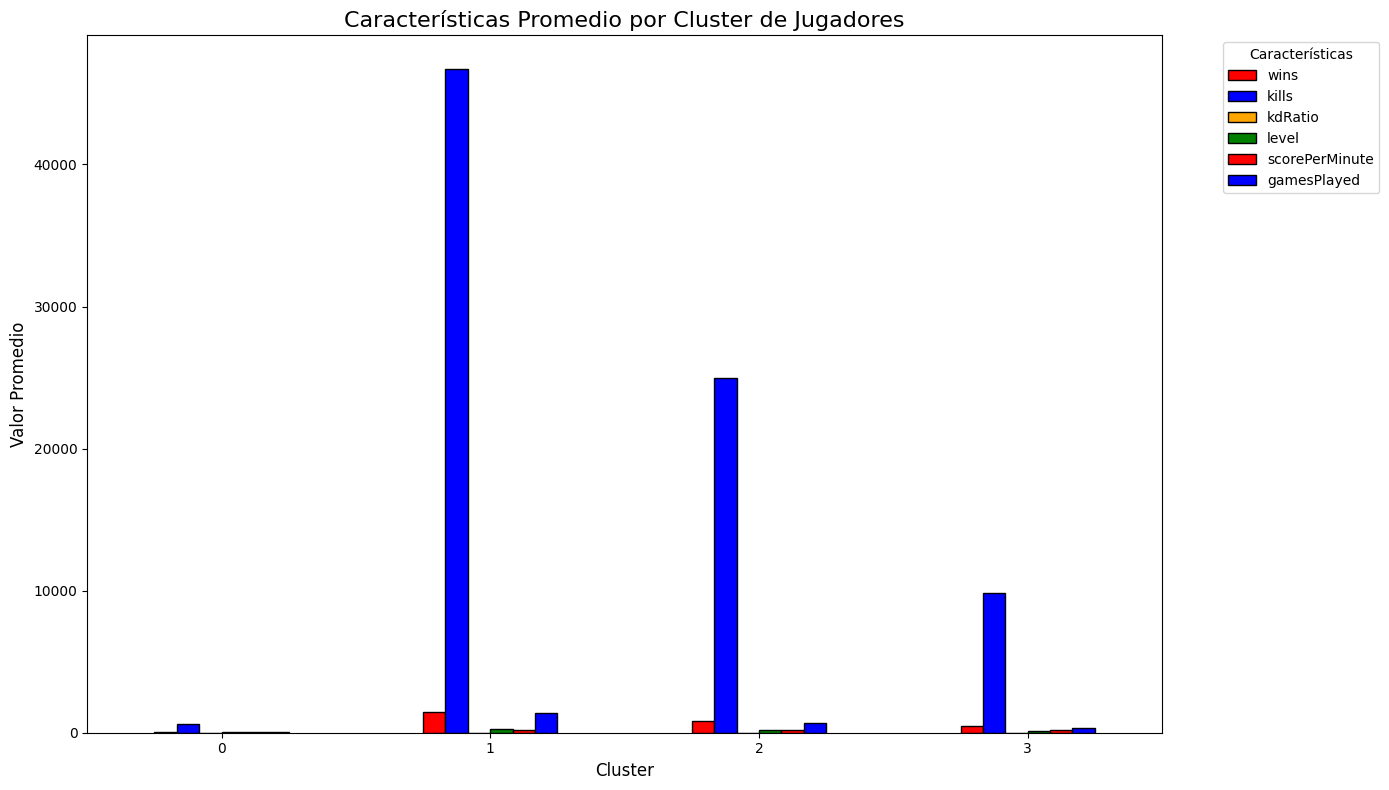

In [9]:
import matplotlib.pyplot as plt

# Características promedio por cluster
cluster_means = df.groupby('Cluster_4')[features].mean()

# Crear gráfico de barras
cluster_means.plot(kind='bar', figsize=(14, 8), color=colors, edgecolor='black')

# Agregar título y etiquetas
plt.title("Características Promedio por Cluster de Jugadores", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Valor Promedio", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Características", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

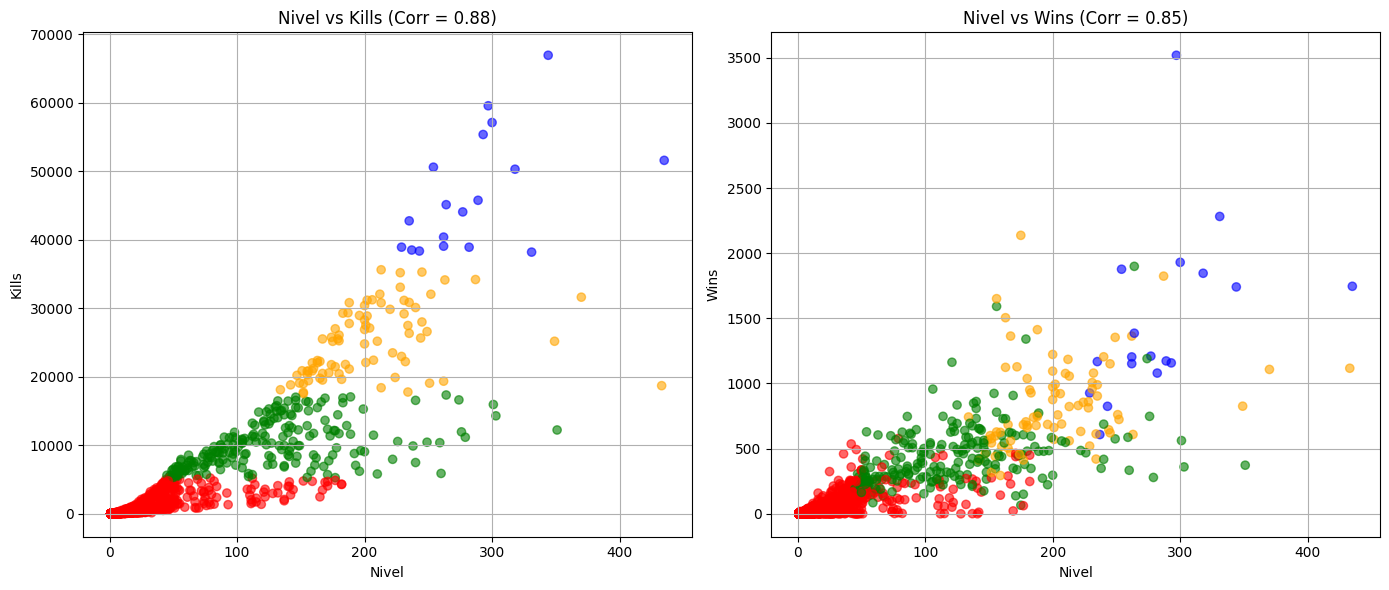

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Nivel vs Kills
plt.subplot(1,2,1)
plt.scatter(df['level'], df['kills'], c=df['Cluster_4'].map({i: colors[i] for i in range(4)}), alpha=0.6)
plt.title(f'Nivel vs Kills (Corr = {df["level"].corr(df["kills"]):.2f})')
plt.xlabel("Nivel")
plt.ylabel("Kills")
plt.grid(True)

# Nivel vs Wins
plt.subplot(1,2,2)
plt.scatter(df['level'], df['wins'], c=df['Cluster_4'].map({i: colors[i] for i in range(4)}), alpha=0.6)
plt.title(f'Nivel vs Wins (Corr = {df["level"].corr(df["wins"]):.2f})')
plt.xlabel("Nivel")
plt.ylabel("Wins")
plt.grid(True)

plt.tight_layout()
plt.show()

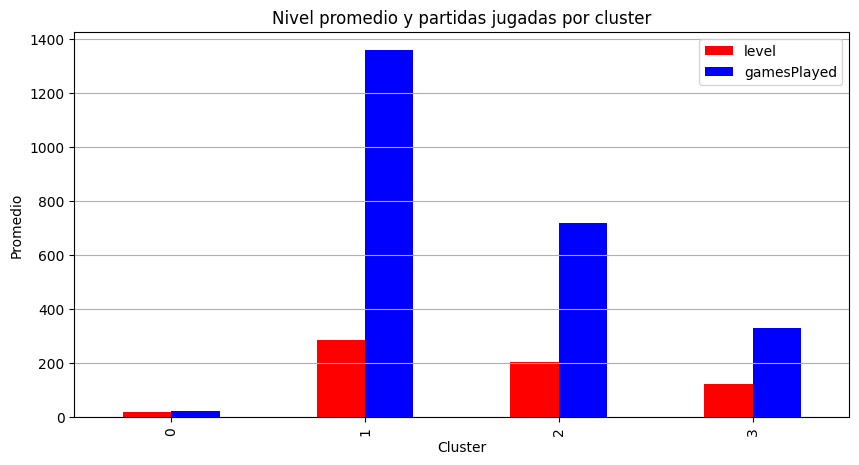

In [11]:
# Promedios nivel y gamesPlayed por cluster
exp_data = df.groupby('Cluster_4')[['level', 'gamesPlayed']].mean()

exp_data.plot(kind='bar', figsize=(10,5), color=colors)
plt.title("Nivel promedio y partidas jugadas por cluster")
plt.xlabel("Cluster")
plt.ylabel("Promedio")
plt.grid(axis='y')
plt.show()